# 1. Dataset cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df_tech = pd.read_csv('../input/tech_companies.csv', encoding = "latin1")
df_tech.head()

Unnamed: 0       from_name  \
0      01:01  Samsung Mobile   
1      01:02  Samsung Mobile   
2      01:03  Samsung Mobile   
3      01:04  Samsung Mobile   
4      01:05  Samsung Mobile   

                                             message  angry_count  haha_count  \
0  Experience the essence of the Galaxy DNA, but ...          8.0        12.0   
1  The #GearFit2, #GearS2 and #GearS3 now seamles...          5.0         5.0   
2  More music to your ears. Spotify is now availa...          8.0         5.0   
3  Introducing Samsung LEVEL Box Slim, a portable...         11.0        18.0   
4          Capture better selfies with #GalaxyA2017.          8.0        10.0   

   love_count  sad_count  wow_count  
0       314.0        3.0      121.0  
1       145.0        1.0       45.0  
2       148.0        2.0       39.0  
3       651.0        4.0      370.0  
4       301.0        3.0      196.0

In [3]:
df_tech.shape

(1355, 8)

Dropping irrelevant columns.

In [4]:
to_drop = ['Unnamed: 0', 'from_name']
df_tech.drop(columns=to_drop, inplace=True)

Removing NA rows and rows which contain no emotions. 

In [5]:
df_tech.dropna(inplace=True)
emotions = ['angry_count', 'haha_count', 'love_count', 'sad_count', 'wow_count']
df_tech = df_tech[~(df_tech[emotions] == 0).all(axis=1)]

Removing duplicates from dataframe.

In [6]:
df_tech.drop_duplicates(inplace=True)

Checking data types.

In [7]:
df_tech.dtypes

message         object
angry_count    float64
haha_count     float64
love_count     float64
sad_count      float64
wow_count      float64
dtype: object

Detecting outliers.

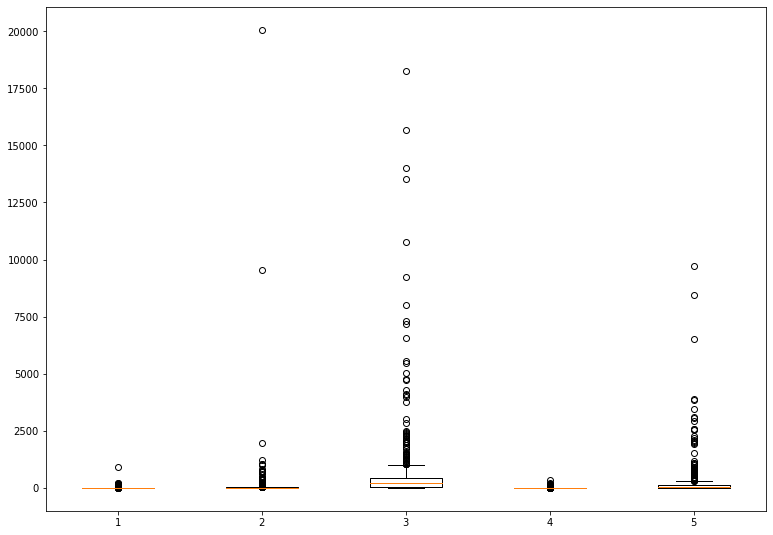

In [8]:
data = [df_tech['angry_count'], df_tech['haha_count'], df_tech['love_count'], df_tech['sad_count'], df_tech['wow_count']]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
ax.boxplot(data)
plt.show()

Removing rows containing an outlier in any of the columns.

In [9]:
df_tech = df_tech[(np.abs(stats.zscore(df_tech[emotions])) < 3).all(axis=1)]

In [11]:
df_tech.head()

message  angry_count  haha_count  \
0  Experience the essence of the Galaxy DNA, but ...          8.0        12.0   
1  The #GearFit2, #GearS2 and #GearS3 now seamles...          5.0         5.0   
2  More music to your ears. Spotify is now availa...          8.0         5.0   
3  Introducing Samsung LEVEL Box Slim, a portable...         11.0        18.0   
4          Capture better selfies with #GalaxyA2017.          8.0        10.0   

   love_count  sad_count  wow_count  
0       314.0        3.0      121.0  
1       145.0        1.0       45.0  
2       148.0        2.0       39.0  
3       651.0        4.0      370.0  
4       301.0        3.0      196.0

About 400 rows were removed from dataset (30%). ---------> izbačeno previše redaka zbog toga što su outlieri?

In [12]:
df_tech.shape

(927, 6)

In [13]:
df_tech.to_pickle("./pkl/tech/document_by_emotion_df.pkl")